In [2]:
import pandas as pd
from rfpimp import *
import numpy as np
from pandas.api.types import is_bool_dtype

In [59]:
df_dep = pd.read_csv('dependency_matrix.gene_info.full_model.rice_blast.txt', sep='\t')
df_dep = df_dep.drop(columns=['Unnamed: 19'])
df_dep = df_dep.set_index('x')
df_dep.index.name = None
df_dep=df_dep.rename(columns = {'f1':'Dependence'})
df_dep = df_dep.replace('x',1.0)

In [3]:
df_dep = pd.read_csv('dependency_matrix.gene_info.full_model.rice_blast.txt', sep='\t')

In [4]:
df_dep

,x,f1,any_te,gene_nearby,gene_gc,flanking_1kb_gc,lengths,tm,signalp,effectorp,H3K27ac,H3K27me3,H3K36me3,cm_expression,ip_expression,eccdna_cov,methylation,go,pfam,Unnamed: 19
0,effectorp,0.983537,0.0015979981648904795,0.0013371217273180358,-0.00040469665194931004,0.023674675779068455,0.5278085689780095,0.16140252183568815,0.7870625502131079,x,0.013744005876557885,0.11661888097911599,0.08341592518424046,0.017742140575796927,0.032895120117730325,0.09911078869272016,0.019613873377739344,0.030250869835305116,0.0009316774785304016,NaN
1,lengths,0.977177,0.00781557747952566,0.01784544414226008,-0.00045157768994363856,0.07138644261271954,x,0.051844499578473036,0.055122572268241354,0.0073112731746118875,0.20931514823856723,0.6613186511948996,0.9925732481874475,0.22858960768111725,0.44185762887778657,0.19801469445514985,0.25451535902857914,0.13427966093852306,0.40746399672465994,NaN
2,H3K27ac,0.998910,0.0007315082302130627,0.005755049383525224,-1.0060927314592405e-06,0.012507218170800694,0.08707474198758258,0.019803419343272788,0.002153095643432801,0.0003389551817605252,x,0.6884696423500809,0.22657089880819126,1.0332880757835712,0.32425231487144146,0.12764353790619154,0.054542992250078304,0.0034206472926557874,0.006007611130812274,NaN
3,H3K36me3,0.997056,0.0029425879279205702,0.0018065967474736322,9.569885711657733e-07,0.019506851349758714,0.5021919890447775,0.0027657590012083455,0.008698415966603923,0.0014319589449155457,0.42580699273135825,1.171620649614813,x,0.16087402732051204,0.1499606949082759,0.11026308697477072,0.07204482378563748,0.005523864200451256,0.005453335104923185,NaN
4,tm,0.993164,0.0018800931695249767,0.007411304128250529,-1.938660244560353e-06,0.02797956070153318,0.30266896143720445,x,0.1281443143071419,0.02467365952639744,0.29038731002748697,0.12341293925869945,0.11990633785090532,0.1388252425973615,0.2736003811453087,0.05755940933280901,0.053015753489555895,0.3167549668717161,0.2863009024470572,NaN
5,go,0.996450,0.0005069708206590917,0.0015094062888175719,7.387926362234509e-06,0.007457415328512296,0.0713333623803527,0.056298999154077656,0.004590567252746869,0.00031008408574650925,0.015402525087344077,0.01997634981750407,0.01592151711269396,0.0248685858416704,0.06895233994540395,0.014857929936967329,0.024791663697544264,x,0.16072854240996015,NaN
6,pfam,0.997126,0.0006482152757046888,0.001023630788648977,-0.00011964302784528424,0.01025863008803296,0.11500781201761678,0.047389144754535595,0.006947988654914972,0.0026722588880148113,0.02495148251861601,0.02115289367136186,0.023725000732722323,0.021448313393564566,0.076438911264195,0.019937267020762373,0.02289589958529903,0.20136261127413202,x,NaN
7,signalp,0.993314,0.0017638777627516644,0.019752091348104073,-6.908433479180243e-05,0.02899374035262625,0.122900902933481,0.1714691418195461,x,0.19958459072707413,0.0553375132867866,0.14964839228795324,0.057544705230936466,0.3515513855650585,0.37867887920653287,0.12566356638854503,0.05572419061064782,0.057969289793963874,0.03139976289982027,NaN
8,ip_expression,0.998364,0.0006550484098095666,0.0021094953251141746,-1.7460824197623737e-07,0.02050692150519262,0.022510165249396308,0.011462117650674952,0.008958246467519082,0.024777945155169623,1.5388726894293332,0.43741329174408106,0.12122209144551632,2.889660850372918,x,0.3258869465135734,0.08298284893376495,0.005736407931493215,0.005290305132590767,NaN
9,gene_nearby,0.983607,0.009675197546661352,x,-0.00019733141300160018,0.1161159135538139,0.04079278079214321,0.0009361645626000392,0.0023620083216230325,0.00016279246014982984,0.056347606149933394,0.08013686939741027,0.017732511306664756,0.03135609970109576,0.05500600308287018,0.0178583431002991,0.012199401682516875,0.003972496482979815,0.015868688664017694,NaN


In [60]:
sort_list = []
for param in df_dep.index:
    sort_list.append(df_dep.columns.tolist().index(param))
df_dep['sort'] = sort_list
df_dep = df_dep.sort_values('sort')
df_dep = df_dep.drop(columns=['sort'])

In [61]:
df_dep

,Dependence,any_te,gene_nearby,gene_gc,flanking_1kb_gc,lengths,tm,signalp,effectorp,H3K27ac,H3K27me3,H3K36me3,cm_expression,ip_expression,eccdna_cov,methylation,go,pfam
any_te,0.864364,1.0,0.08828079945668355,0.0013914060442528076,0.11595594647240381,0.10532086652745776,0.008294372090847268,0.013235661797241671,0.00024263609842578582,0.052039963100113606,0.6419696191976,0.09791047584052459,0.05965393456667656,0.04010679621969149,0.033770156142558405,0.06600560683862167,0.0183395481009061,0.020570756339685303
gene_nearby,0.983607,0.009675197546661352,1.0,-0.00019733141300160018,0.1161159135538139,0.04079278079214321,0.0009361645626000392,0.0023620083216230325,0.00016279246014982984,0.056347606149933394,0.08013686939741027,0.017732511306664756,0.03135609970109576,0.05500600308287018,0.0178583431002991,0.012199401682516875,0.003972496482979815,0.015868688664017694
gene_gc,-0.158628,-0.00399230170948317,-0.01610462106042565,1.0,-0.09793754511650987,-0.106296418968443,-0.010546342248575424,-0.008772134722757619,-0.003922169624038796,-0.09627503234757206,-0.09642144558350418,-0.09509494318158151,-0.10024449876422592,-0.10823758774608927,-0.09651160230481448,-0.0921011088066479,-0.011971082306274639,-0.017447348052716194
flanking_1kb_gc,0.610541,0.05342185282255418,0.33144712564673007,-0.0024636618237988683,1.0,0.3087825693866957,0.015215410432255938,0.025633076743200145,0.005349482867520905,0.37368126314812833,0.4323680431672302,0.12223820430291266,0.22696323677428532,0.1490716406056547,0.21767802129711333,0.11042221832547239,0.04693155058800946,0.05325326080843662
lengths,0.977177,0.00781557747952566,0.01784544414226008,-0.00045157768994363856,0.07138644261271954,1.0,0.051844499578473036,0.055122572268241354,0.0073112731746118875,0.20931514823856723,0.6613186511948996,0.9925732481874475,0.22858960768111725,0.44185762887778657,0.19801469445514985,0.25451535902857914,0.13427966093852306,0.40746399672465994
tm,0.993164,0.0018800931695249767,0.007411304128250529,-1.938660244560353e-06,0.02797956070153318,0.30266896143720445,1.0,0.1281443143071419,0.02467365952639744,0.29038731002748697,0.12341293925869945,0.11990633785090532,0.1388252425973615,0.2736003811453087,0.05755940933280901,0.053015753489555895,0.3167549668717161,0.2863009024470572
signalp,0.993314,0.0017638777627516644,0.019752091348104073,-6.908433479180243e-05,0.02899374035262625,0.122900902933481,0.1714691418195461,1.0,0.19958459072707413,0.0553375132867866,0.14964839228795324,0.057544705230936466,0.3515513855650585,0.37867887920653287,0.12566356638854503,0.05572419061064782,0.057969289793963874,0.03139976289982027
effectorp,0.983537,0.0015979981648904795,0.0013371217273180358,-0.00040469665194931004,0.023674675779068455,0.5278085689780095,0.16140252183568815,0.7870625502131079,1.0,0.013744005876557885,0.11661888097911599,0.08341592518424046,0.017742140575796927,0.032895120117730325,0.09911078869272016,0.019613873377739344,0.030250869835305116,0.0009316774785304016
H3K27ac,0.998910,0.0007315082302130627,0.005755049383525224,-1.0060927314592405e-06,0.012507218170800694,0.08707474198758258,0.019803419343272788,0.002153095643432801,0.0003389551817605252,1.0,0.6884696423500809,0.22657089880819126,1.0332880757835712,0.32425231487144146,0.12764353790619154,0.054542992250078304,0.0034206472926557874,0.006007611130812274
H3K27me3,0.998146,0.06030476533419049,0.01185629039025382,-8.385106542441179e-08,0.007628084356752218,0.09503820581482592,0.0010678897467010229,0.00529412615429492,0.0015713326921810156,0.9228444105637285,1.0,0.34255493548877647,0.11631191774471861,0.08708982868277237,0.06831354858146421,0.029870210957419596,0.004069282307376243,0.006188636937212499


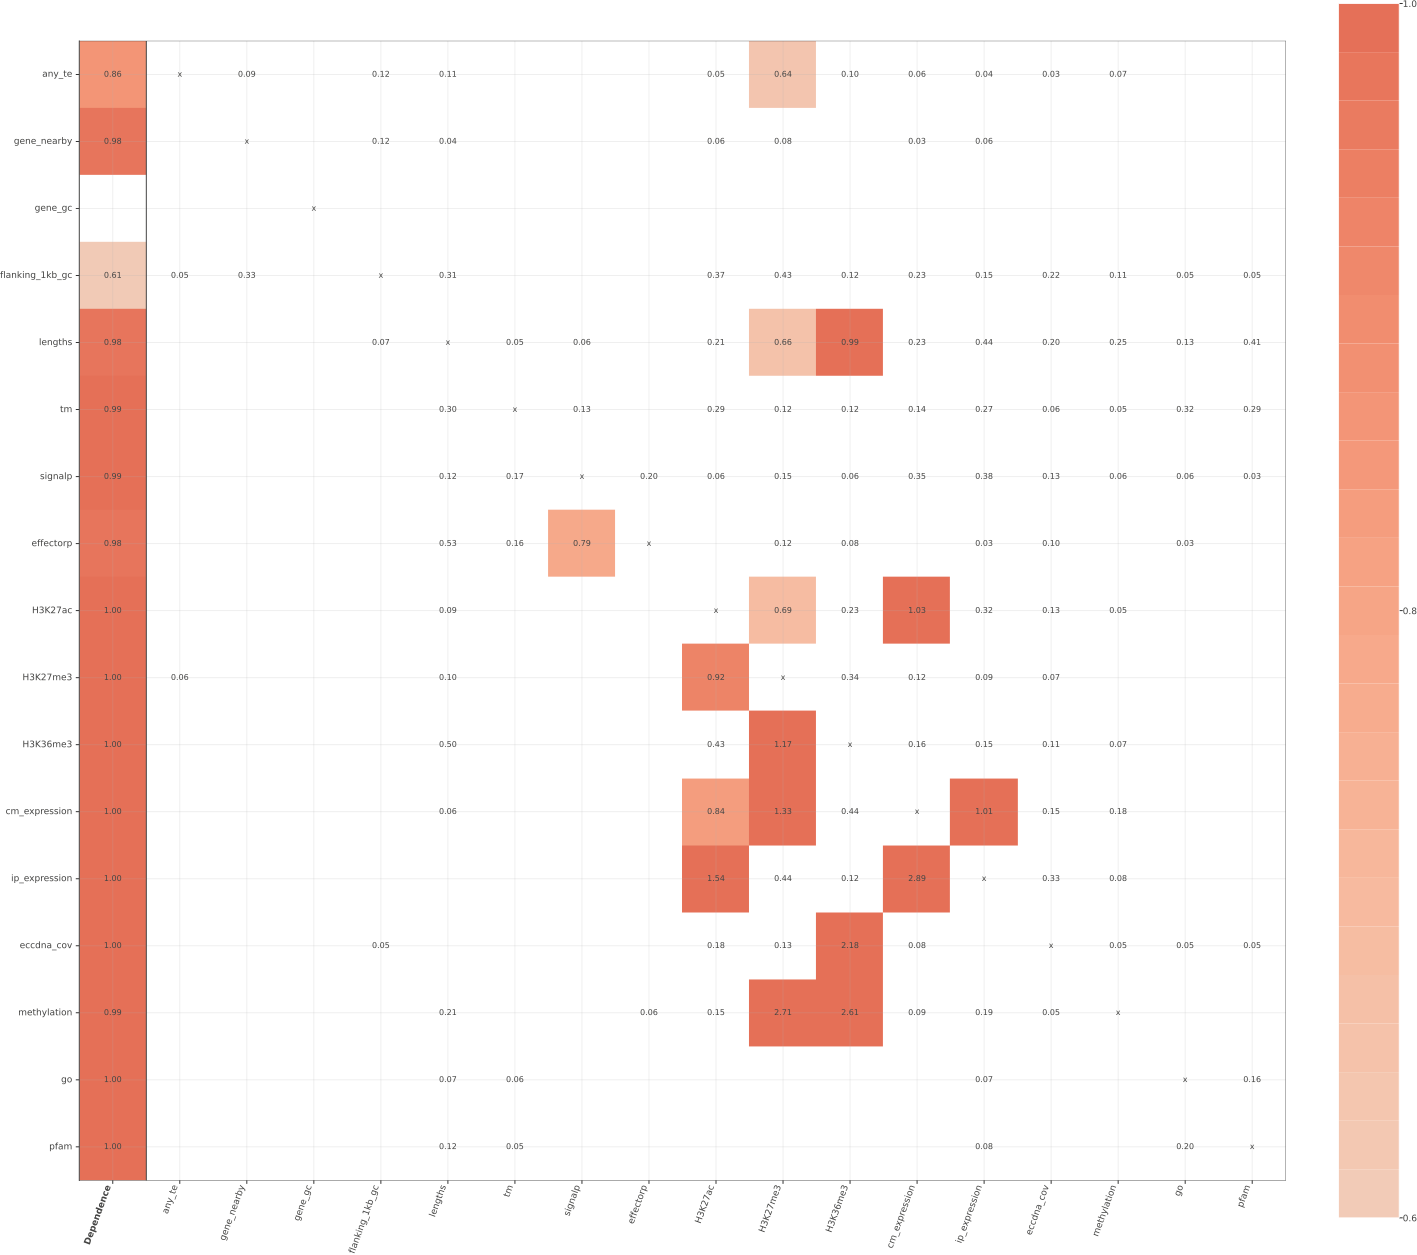

In [64]:
viz = plot_dependence_heatmap(df_dep, figsize=(20,20))
viz.save('dependence_heatmap.pdf')
viz

In [86]:
input_df = '../gene_info.full_model.rice_blast.txt'
majority_fraction =  0.5 ## just to get trues and falses balanced well
approach = 'RF'
n_estimators = 500
min_samples_split =  2
min_samples_leaf = 1
max_features = 'None'
max_depth = 'None'
bootstrap = 'True'

In [87]:
def none_or_str(value):
    if value == 'None':
        return None
    return value

max_features = none_or_str(max_features)


def none_or_int(value):
    if value == 'None':
        return None
    return int(value)

max_depth = none_or_int(max_depth)

In [88]:
args_dict = {
    "n_estimators": n_estimators,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features,
    "max_depth": max_depth,
    "bootstrap": bootstrap
}

In [89]:
def feature_dependence_matrix_mine(X_train,
                              rfrmodel=RandomForestRegressor(**args_dict, oob_score=True),
                              rfcmodel=RandomForestClassifier(**args_dict, oob_score=True),
                              zero=0.001,
                              sort_by_dependence=False,
                              n_samples=400000):
    all_cols = [col for col in X_train]
    boolcols = [col for col in X_train if is_bool_dtype(X_train[col])]
    X_train = sample_rows(X_train, n_samples)
    df_dep = pd.DataFrame(index=X_train.columns, columns=['Dependence']+X_train.columns.tolist())
    for i,col in enumerate(all_cols):
        print(col)
        X, y = X_train.drop(col, axis=1), X_train[col]
        if col in boolcols:
            rf = clone(rfcmodel)
            rf.fit(X,y)
            imp = permutation_importances_raw(rf, X, y, oob_classifier_f1_score, n_samples)
        else:
            rf = clone(rfrmodel)
            rf.fit(X,y)
            imp = permutation_importances_raw(rf, X, y, oob_regression_r2_score, n_samples)
        imp = np.clip(imp, a_min=0.0, a_max=1.0)
        imp[imp<zero] = 0.0
        imp = np.insert(imp, i, 1.0)
        df_dep.iloc[i] = np.insert(imp, 0, rf.oob_score_) # add overall dependence
    if sort_by_dependence:
        return df_dep.sort_values('Dependence', ascending=False)
    return df_dep

In [79]:
X_train = pd.read_csv('x_train.gene_info.full_model.rice_blast.txt')

In [80]:
X_train

,any_te,gene_nearby,gene_gc,flanking_1kb_gc,lengths,tm,signalp,effectorp,H3K27ac,H3K27me3,H3K36me3,cm_expression,ip_expression,eccdna_cov,methylation,go,pfam
0,False,True,0.417363,0.493500,386,True,True,False,137.8620,46.4408,99.0033,106.643000,121.10700,66.7733,0.431740,True,False
1,False,True,0.473437,0.497500,2666,False,False,False,107.0360,35.7299,88.5423,33.978400,12.81940,145.5450,0.429591,True,True
2,False,True,0.356203,0.469060,2129,False,False,False,34.5801,99.0270,120.0010,3.195270,3.30479,46.4478,0.350172,False,True
3,True,True,0.430253,0.494500,722,False,True,False,97.6263,29.1897,25.5345,3.946640,27.19770,19.5438,0.251637,False,False
4,False,True,0.480075,0.416886,2129,False,False,False,34.5801,99.0270,120.0010,3.195270,3.30479,46.4478,0.350172,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426812,True,True,0.490729,0.506500,590,False,True,True,28.7443,280.7470,140.6380,0.331382,5.00311,706.1750,0.212463,False,False
426813,False,True,0.382353,0.482000,1291,False,False,False,45.0907,70.6030,66.9313,8.807950,23.15010,36.7693,0.325584,True,True
426814,True,False,0.498812,0.573500,623,False,False,False,24.3531,377.6620,118.8360,0.089489,0.00000,68.3115,0.288210,False,False
426815,False,True,0.360424,0.397828,242,False,False,False,32.6211,449.4750,136.1370,0.602633,0.00000,22.3659,0.377401,False,False


In [91]:
df_dep_matrix = feature_dependence_matrix_mine(X_train, sort_by_dependence=False)

any_te


KeyboardInterrupt: 

In [90]:
df_dep_matrix

,Dependence,any_te,gene_nearby,gene_gc,flanking_1kb_gc,lengths,tm,signalp,effectorp,H3K27ac,H3K27me3,H3K36me3,cm_expression,ip_expression,eccdna_cov,methylation,go,pfam
any_te,0.8952,1.0,0.027384,0.004464,0.028447,0.021274,0.005447,0.0,0.0,0.041779,0.210589,0.008037,0.018942,0.010397,0.021682,0.018826,0.002589,0.0
gene_nearby,0.8156,0.017059,1.0,0.0,0.126914,0.02412,0.002443,0.007155,0.001017,0.036732,0.062865,0.00628,0.010923,0.0186,0.018942,0.016651,0.002242,0.001221
gene_gc,-0.148888,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flanking_1kb_gc,0.136561,0.008962,0.140048,0.028738,1.0,0.079702,0.001309,0.003172,0.0,0.05346,0.08111,0.050864,0.048276,0.033831,0.062857,0.023164,0.002978,0.003262
lengths,0.559589,0.0,0.003768,0.0,0.022267,1.0,0.009279,0.010032,0.00124,0.065787,0.423555,0.612679,0.062316,0.116176,0.114883,0.068341,0.073045,0.087366
tm,0.859,0.0,0.008755,0.0,0.023122,0.080796,1.0,0.035972,0.006428,0.051673,0.022818,0.034065,0.039351,0.065205,0.021121,0.020582,0.130888,0.098808
signalp,0.9106,0.0,0.00677,0.0,0.028303,0.02221,0.053509,1.0,0.131492,0.021379,0.062628,0.031942,0.075224,0.077417,0.047134,0.024021,0.030282,0.0
effectorp,0.9814,0.001085,0.0,0.0,0.007477,0.195397,0.066066,0.303767,1.0,0.00612,0.066461,0.013784,0.001085,0.017826,0.036774,0.017429,0.001474,0.0
H3K27ac,0.71589,0.0,0.004692,0.0,0.008751,0.045207,0.001984,0.0,0.0,1.0,0.401998,0.127703,0.701113,0.09685,0.038545,0.011902,0.001852,0.008277
H3K27me3,0.862057,0.030064,0.003589,0.0,0.010101,0.02878,0.0,0.0,0.0,0.789856,1.0,0.281458,0.017591,0.015839,0.023799,0.008628,0.001073,0.0


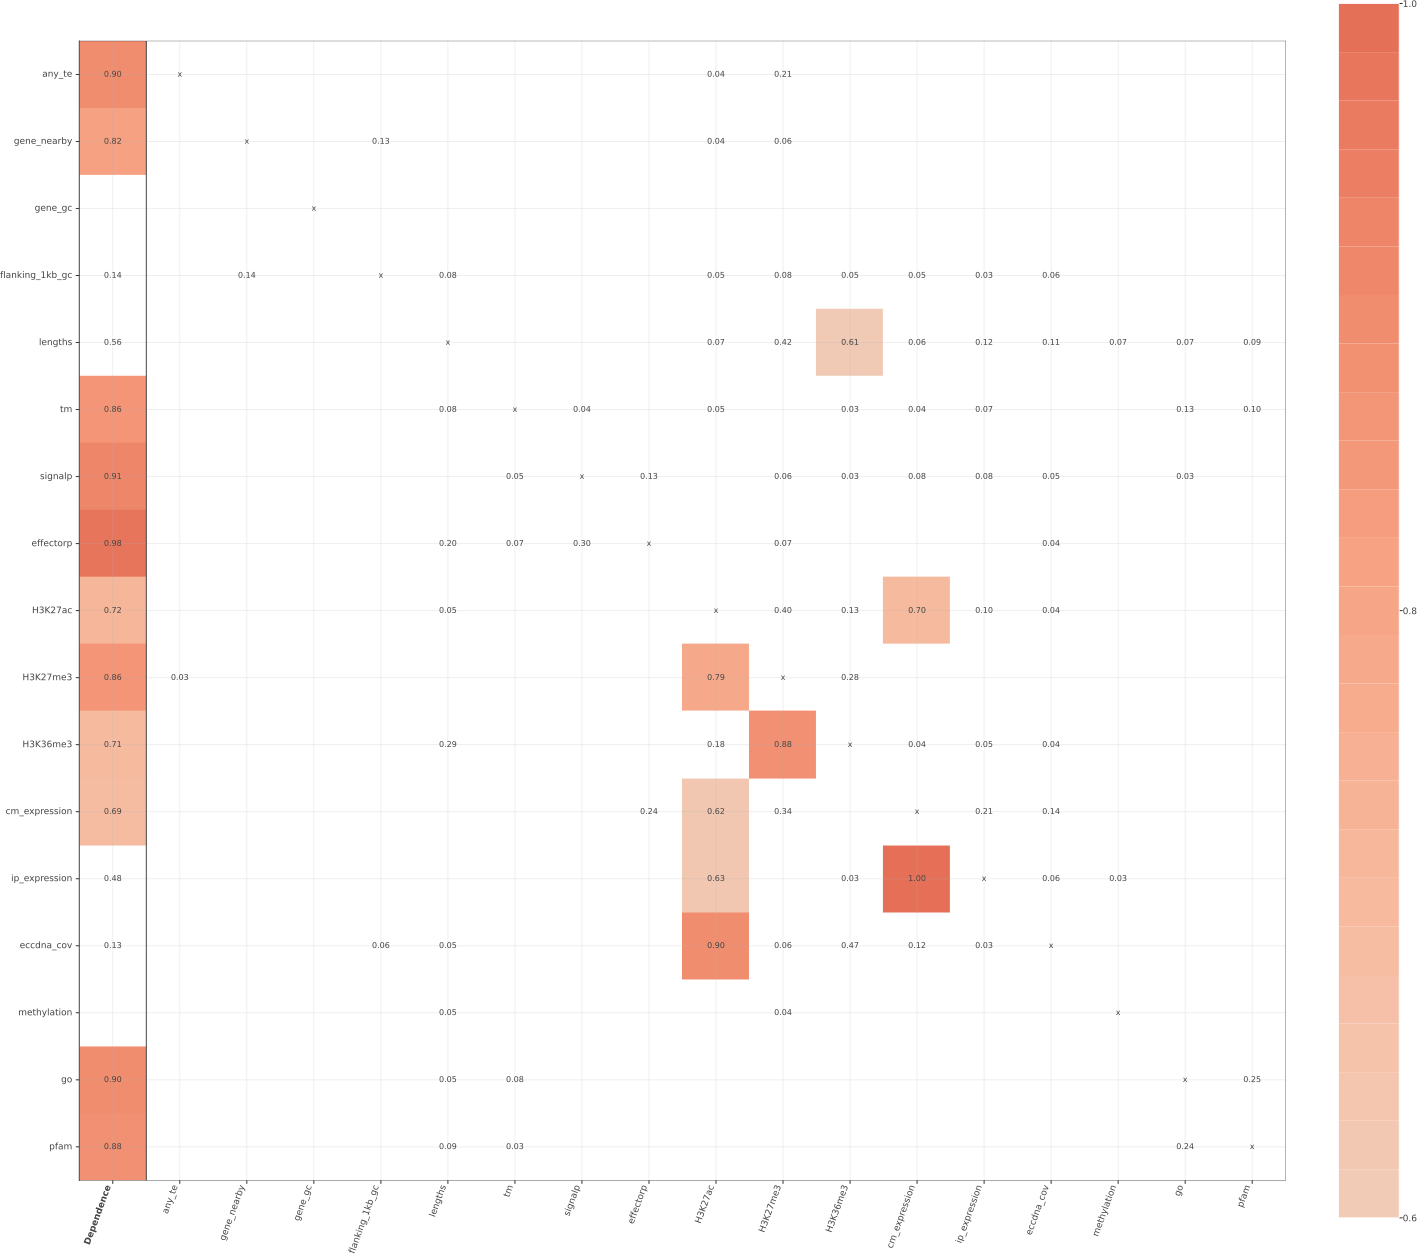

In [85]:
viz = plot_dependence_heatmap(df_dep_matrix, figsize=(20,20))
viz.save('dependence_heatmap_rfpiimp.pdf')
viz